<a href="https://colab.research.google.com/github/youyinnn/s2search/blob/pipelining/s2search_score_ploting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Imports

In [2]:
%load_ext autoreload
%autoreload 2
import sys
from os import listdir, path
import numpy as np

from genericpath import isfile
import matplotlib.pyplot as plt

### Fetching npy files from github(if you are using colab)

With git cmd

In [3]:
import sys
in_colab = 'google.colab' in sys.modules

if in_colab:
    !rm -rf s2search
    !git clone --branch pipelining https://github.com/youyinnn/s2search.git
    sys.path.insert(1, './s2search')

### Pick an experiment

In [13]:
from feature_masking import masking_options
from pick_exp_and_sample import ask

masking_option_keys, sample_name, sample_origin_npy, d_features, exp, description = ask(in_colab);

Got experiments: ['exp1', 'exp3', 'exp2']
Experiment exp2's description:  
Experiment No.2, search in 30000 randomly papers from cs.LG. 
Maksing all features solely.
Got sample data: ['sample']


### Ploting the data

#### Include negation

Experiment exp3's description:  
Experiment No.3, using the same data of exp2. Replacing all 'machine learning' with '' on the title using rt2.
with masking options: ['t', 'abs', 'v', 'au', 'y', 'c', 'rt2']


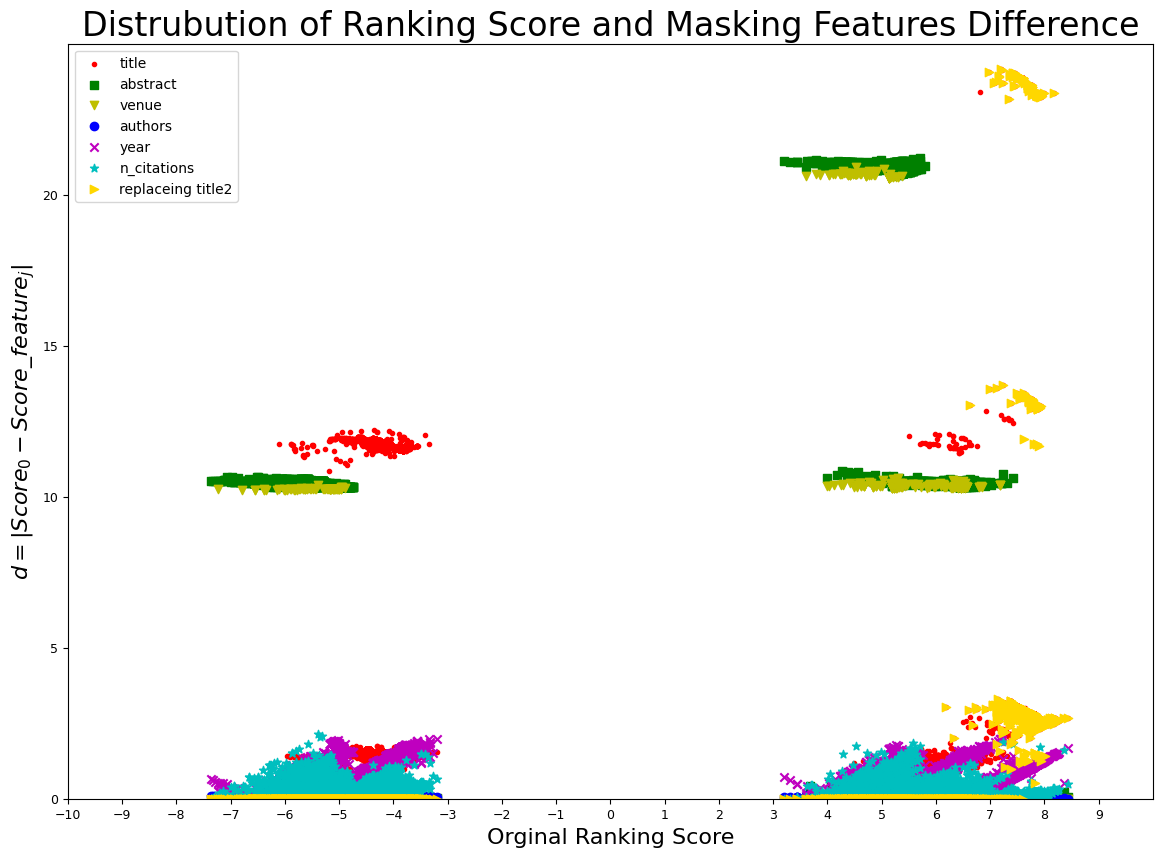

In [4]:
# ploting
print(f'Experiment {exp}\'s description: {description}')
print(f'with masking options: {masking_option_keys}')
def plot_scores_d(d_features,sample_origin_npy): 
  plt.figure(figsize=(14, 10), dpi=100)
  i = 0
  for key in masking_option_keys:
    # print(masking_options[key])
    plt.scatter(
        sample_origin_npy,d_features[i],
        c=masking_options[key]['color'], 
        marker=masking_options[key]['marker'],
        label=masking_options[key]['plot_legend']
    )
    i += 1

  plt.xlabel('Orginal Ranking Score',fontsize=16)
  plt.ylabel('$ d = |Score_0 - Score\_feature_j|$', fontsize=16)
  plt.title('Distrubution of Ranking Score and Masking Features Difference', fontsize=24)
  x_max = 10
  x_min = -10
  x_pace = 1
  y_max = 25
  y_min = 0
  y_pace = 5
  plt.xticks(np.arange(x_min, x_max, x_pace), size = 9) 
  plt.yticks(np.arange(y_min, y_max, y_pace), size = 9)
  plt.ylim(y_min, y_max)
  plt.xlim(x_min, x_max)
  plt.legend(prop={'size': 10})
  plt.show()

plot_scores_d(d_features, sample_origin_npy)

#### Only positive score

Experiment exp2's description:  
Experiment No.2, search in 30000 randomly papers from cs.LG. 
Maksing all features solely.
with masking options: ['t', 'abs', 'v', 'au', 'y', 'c']


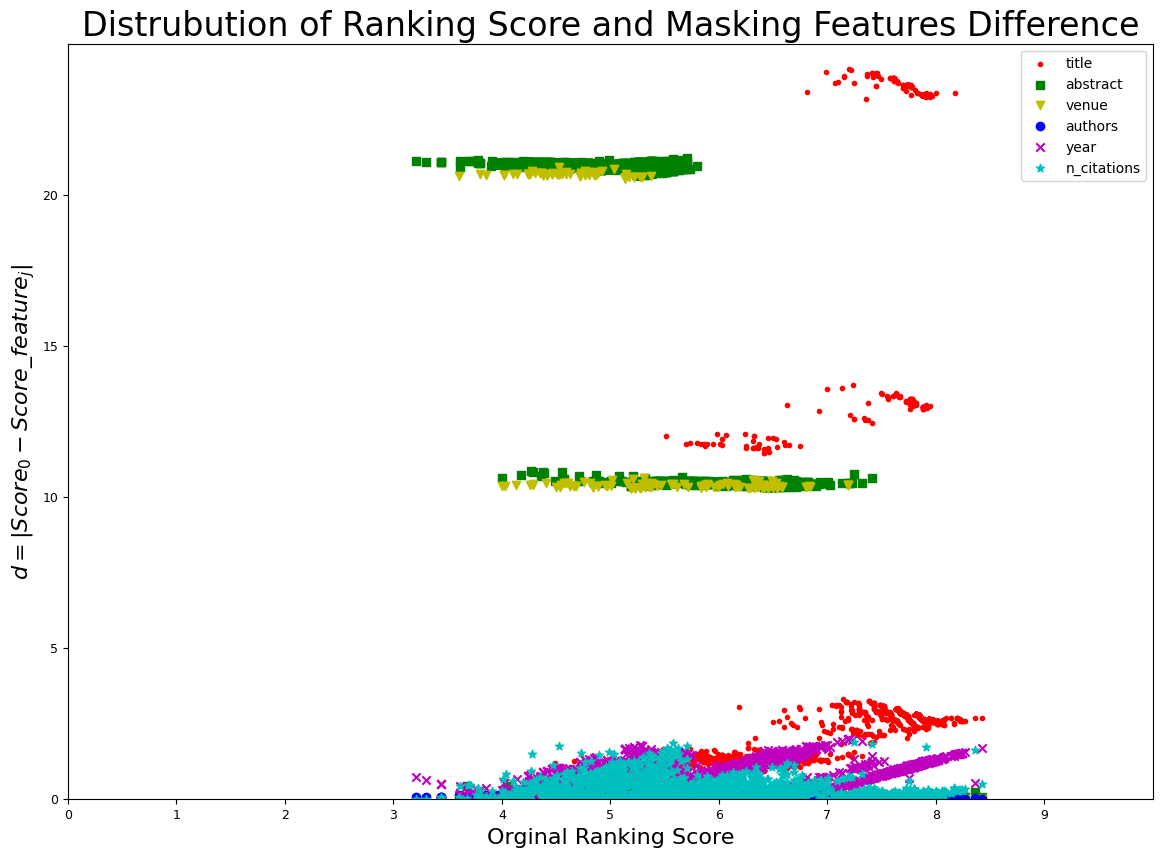

In [14]:
# ploting
print(f'Experiment {exp}\'s description: {description}')
print(f'with masking options: {masking_option_keys}')
def plot_scores_d(d_features,sample_origin_npy): 
  plt.figure(figsize=(14, 10), dpi=100)
  i = 0
  for key in masking_option_keys:
    # print(masking_options[key])
    plt.scatter(
        sample_origin_npy,d_features[i],
        c=masking_options[key]['color'], 
        marker=masking_options[key]['marker'],
        label=masking_options[key]['plot_legend']
    )
    i += 1

  plt.xlabel('Orginal Ranking Score',fontsize=16)
  plt.ylabel('$ d = |Score_0 - Score\_feature_j|$', fontsize=16)
  plt.title('Distrubution of Ranking Score and Masking Features Difference', fontsize=24)
  x_max = 10
  x_min = 0
  x_pace = 1
  y_max = 25
  y_min = 0
  y_pace = 5
  plt.xticks(np.arange(x_min, x_max, x_pace), size = 9) 
  plt.yticks(np.arange(y_min, y_max, y_pace), size = 9)
  plt.ylim(y_min, y_max)
  plt.xlim(x_min, x_max)
  plt.legend(prop={'size': 10})
  plt.show()

plot_scores_d(d_features, sample_origin_npy)